<a href="https://colab.research.google.com/github/Miyazaki-Kohei/adhoc_analysis/blob/main/Chrn_Rate_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the seed for reproducibility
np.random.seed(42)

## サンプル用の顧客データを準備

シミュレーションのために、顧客の在籍期間、月額料金、解約の有無など、顧客に関する情報を含むデータセットがあると仮定します。

以下にデータセットのサンプルを示す：

In [3]:
data = pd.DataFrame({
    'tenure': np.random.randint(1, 36, 1000),
    'monthly_charges': np.random.uniform(20, 100, 1000),
    'churn': np.random.choice([0, 1], size=1000, p=[0.8, 0.2])
})

data.head()

,tenure,monthly_charges,churn
0,16,42.247961,0
1,22,37.356500,0
2,21,43.040428,0
3,21,64.506241,0
4,8,22.332415,1


## 顧客行動をシミュレートする
解約の確率分布を定義することで、モンテカルロ シミュレーションを使用して顧客解約をモデル化します。

ここでは簡単にするために、解約の確率は契約期間の長さと月額料金に応じて増加すると仮定しますが、実際のケースにおいては現状のデータと解約の傾向を定式化し、適切な確率分布に近づける必要があります。

In [6]:
def churn_probability(tenure, monthly_charges):
    return min(0.01 * tenure + 0.001 * monthly_charges, 1)

# データセットの解約確率を計算する
data['churn_rate'] = data.apply(lambda x: churn_probability(x['tenure'], x['monthly_charges']), axis=1)

print(data.head())

   tenure  monthly_charges  churn  churn_rate
0      16        42.247961      0    0.202248
1      22        37.356500      0    0.257356
2      21        43.040428      0    0.253040
3      21        64.506241      0    0.274506
4       8        22.332415      1    0.102332


## シミュレーションの実行
モンテカルロ・シミュレーションを行い、今後1ヶ月間に解約する可能性のある顧客数を予測します。

各顧客について乱数を引き、それを解約確率と比較します。

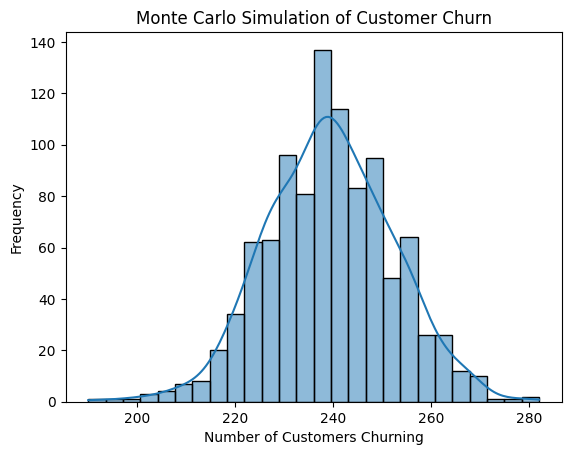

In [7]:
def run_simulation(data, num_simulations=1000):
    churn_results = []

    for _ in range(num_simulations):
        simulated_churn = data['churn_rate'].apply(lambda x: np.random.rand() < x).sum()
        churn_results.append(simulated_churn)

    return churn_results

# Running the simulation
simulation_results = run_simulation(data)

# Plotting the results
sns.histplot(simulation_results, kde=True)
plt.title('Monte Carlo Simulation of Customer Churn')
plt.xlabel('Number of Customers Churning')
plt.ylabel('Frequency')
plt.show()

## 結果の解釈
上のヒストグラムは、シミュレーションに基づき、1ヶ月間に解約すると予測される顧客数の分布を示しています。
ここから、予想解約数と信頼区間を導き出すことができます。

In [8]:
mean_churn = np.mean(simulation_results)
std_churn = np.std(simulation_results)

print(f'Expected number of churns: {mean_churn:.2f}')
print(f'Standard deviation: {std_churn:.2f}')

Expected number of churns: 239.25
Standard deviation: 12.90


## 洞察
シミュレーションから得られてた洞察を活用して、企業はターゲットを絞った顧客保持戦略を策定します。

例：

* **リスクのある顧客を特定する**:
  * 解約の可能性が高い顧客に焦点を当てます。
* **パーソナライズされたオファー**:
  * リスクのある顧客を維持するために割引や特別オファーを提供します。
* **顧客サービスの向上**:
  * 解約の可能性が高い契約期間に近づいている顧客に対するサポートを強化します。

シミュレーションはデータから未来どのようになっていくのかを確率的に予測することが可能です。統計的に解く必要があり実装には専門知識が必要ですが、使いこなせれば強力な武器となりえます。
